In [94]:
#imports
import testdata.TestDataGenerator as tdg
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy

In [95]:
#definitions

DIMENSIONS=2
SENSORS= 4

COORDINATE_SYSTEM = 1

INPUT_NODES = SENSORS
HIDDEN_NODES = [64,64]
OUTPUT_NODES = DIMENSIONS



In [96]:
#Generate train data

distances, datapoints, sensors = tdg.generateStatic4PointIO(100,2,COORDINATE_SYSTEM)


xOut_Train = []
yOut_Train = []
for i in range(len(datapoints)):
    xOut_Train.append(numpy.array(datapoints[i][0]))
    yOut_Train.append(numpy.array(datapoints[i][1]))


In [97]:
#Generate Model

inp = keras.layers.Input((SENSORS,))

x = keras.layers.Dense(64, activation='relu')(inp)
x = keras.layers.Dense(64, activation='relu')(x)
xOut = keras.layers.Dense(1, activation='sigmoid', name='xOut')(x)
yOut = keras.layers.Dense(1, activation='sigmoid', name='yOut')(x)
model = keras.models.Model(inputs=inp, outputs=[xOut, yOut])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


Epoch 1/25
100/100 [==============================] - 1s 5ms/step - loss: 0.1738 - xOut_loss: 0.0912 - yOut_loss: 0.0826 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 2/25
100/100 [==============================] - 0s 136us/step - loss: 0.1555 - xOut_loss: 0.0813 - yOut_loss: 0.0742 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 3/25
100/100 [==============================] - 0s 130us/step - loss: 0.1423 - xOut_loss: 0.0750 - yOut_loss: 0.0673 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 4/25
100/100 [==============================] - 0s 124us/step - loss: 0.1311 - xOut_loss: 0.0693 - yOut_loss: 0.0618 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 5/25
100/100 [==============================] - 0s 115us/step - loss: 0.1212 - xOut_loss: 0.0642 - yOut_loss: 0.0570 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 6/25
100/100 [==============================] - 0s 113us/step - loss: 0.1109 - xOut_loss: 0.0589 - yOut_loss: 0.0519 - xOut_acc: 0.0000e+00 - yOut_acc:

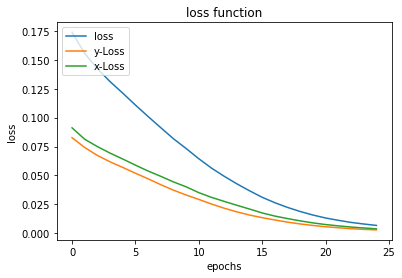

In [98]:
hist = model.fit(distances,[xOut_Train, yOut_Train,],epochs =25)
plt.title('loss function')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['yOut_loss'])
plt.plot(hist.history['xOut_loss'])
plt.legend(['loss', 'y-Loss', 'x-Loss'], loc='upper left')

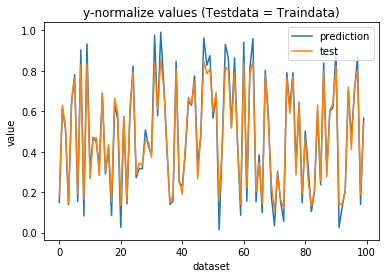

In [102]:
result = model.predict(distances)

plt.ylabel('value')
plt.xlabel('dataset')
plt.title('y-normalize values (Testdata = Traindata)')
plt.plot(yOut_Train)   
plt.plot(result[1])
plt.legend(['prediction', 'test'])

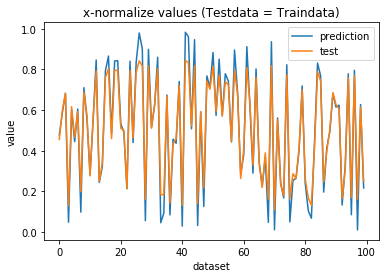

In [103]:
plt.title('x-normalize values (Testdata = Traindata)')
plt.ylabel('value')
plt.xlabel('dataset')
plt.plot(xOut_Train)   
plt.plot(result[0])
plt.legend(['prediction', 'test'])

In [101]:
test_distance, test_datapoint, test_sensor = tdg.generateStatic4PointIO(1,2,COORDINATE_SYSTEM)
xOut_Test = []
yOut_Test = []
for i in range(len(test_datapoint)):
    xOut_Test.append(numpy.array(test_datapoint[i][0]))
    yOut_Test.append(numpy.array(test_datapoint[i][1]))
    
    
result = model.predict(test_distance)

print(result)
print(xOut_Test, yOut_Test)

[array([[0.33749342]], dtype=float32), array([[0.58943856]], dtype=float32)]
[array(0.32396145)] [array(0.59809213)]
